# 모델 성능 향상

### 데이터 확인과 검증셋

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

!git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [2]:
# 와인 데이터
df = pd.read_csv('./data/wine.csv', header=None)

In [3]:
# 데이터 확인
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
# 와인 속성 X, 와인 분류 y
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [5]:
# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [6]:
# 모델 구조 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Epoch 1/50
8/8 [==============================] - 2s 40ms/step - loss: 6.0238 - accuracy: 0.1442 - val_loss: 2.6076 - val_accuracy: 0.0777
Epoch 2/50
8/8 [==============================] - 0s 14ms/step - loss: 1.6050 - accuracy: 0.2422 - val_loss: 0.7667 - val_accuracy: 0.6185
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 0.7045 - accuracy: 0.7244 - val_loss: 0.6677 - val_accuracy: 0.7546
Epoch 4/50
8/8 [==============================] - 0s 17ms/step - loss: 0.6208 - accuracy: 0.7616 - val_loss: 0.5655 - val_accuracy: 0.7715
Epoch 5/50
8/8 [==============================] - 0s 12ms/step - loss: 0.4864 - accuracy: 0.7932 - val_loss: 0.4293 - val_accuracy: 0.8062
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.3817 - accuracy: 0.8329 - val_loss: 0.3610 - val_accuracy: 0.8500
Epoch 7/50
8/8 [==============================] - 0s 22ms/step - loss: 0.3175 - accuracy: 0.8684 - val_loss: 0.3279 - val_accuracy: 0.8754
Epoch 8/50
8/8 [===========

In [8]:
# 테스트 결과 출력
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 4ms/step - loss: 0.1494 - accuracy: 0.9423
Test accuracy: 0.942307710647583


## 모델 업데이트

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 와인 데이터
df = pd.read_csv('./data/wine.csv', header=None)

In [11]:
# 와인 속성 X, 와인 분류 y
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [12]:
# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [13]:
# 모델 구조 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 모델 저장 설정 및 실행

In [15]:
# 모델 저장 조건 설정
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [16]:
# 모델 실행 
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.7454.hdf5

Epoch 2: saving model to ./data/model/all/02-0.7454.hdf5

Epoch 3: saving model to ./data/model/all/03-0.7408.hdf5

Epoch 4: saving model to ./data/model/all/04-0.7454.hdf5

Epoch 5: saving model to ./data/model/all/05-0.7431.hdf5

Epoch 6: saving model to ./data/model/all/06-0.7485.hdf5

Epoch 7: saving model to ./data/model/all/07-0.7862.hdf5

Epoch 8: saving model to ./data/model/all/08-0.8623.hdf5

Epoch 9: saving model to ./data/model/all/09-0.8923.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9131.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9315.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9354.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9346.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9369.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9377.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9362.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9369.hdf5

Epoch

In [17]:
# 테스트 결과 출력
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1181 - accuracy: 0.9577
Test accuracy: 0.9576923251152039


## 과적합 확인

### 와인 종류 예측

In [18]:
# 그래프 확인 학습 
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1356 - accuracy: 0.9512 - val_loss: 0.1117 - val_accuracy: 0.9608
Epoch 2/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1348 - accuracy: 0.9528 - val_loss: 0.1104 - val_accuracy: 0.9623
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1332 - accuracy: 0.9538 - val_loss: 0.1092 - val_accuracy: 0.9654
Epoch 4/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1298 - accuracy: 0.9518 - val_loss: 0.1072 - val_accuracy: 0.9631
Epoch 5/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1287 - accuracy: 0.9523 - val_loss: 0.1069 - val_accuracy: 0.9685
Epoch 6/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1285 - accuracy: 0.9561 - val_loss: 0.1045 - val_accuracy: 0.9638
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1283 - accuracy: 0.9556 - val_loss: 0.1029 - val_accuracy: 0.9662
Epoch 8/2000
8/8 [=

In [19]:
# 저장된 학습 결과 확인 
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.135585,0.951245,0.111728,0.960769
1,0.134811,0.952784,0.110378,0.962308
2,0.133241,0.953811,0.109219,0.965385
3,0.129796,0.951758,0.107209,0.963077
4,0.128727,0.952271,0.106857,0.968462
...,...,...,...,...
1995,0.032941,0.991275,0.086868,0.982308
1996,0.033867,0.991019,0.069116,0.988462
1997,0.030535,0.991789,0.066082,0.988462
1998,0.033018,0.991019,0.067913,0.987692


In [20]:
# 테스트셋 오차 저장
y_vloss=hist_df['val_loss']

# 학습셋 오차 저장
y_loss=hist_df['loss']

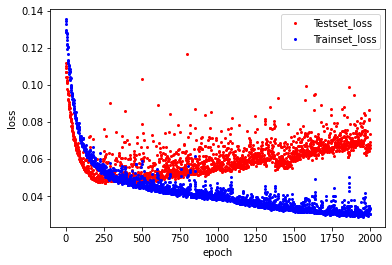

In [21]:
#x 값 지정, 오차 색깔 지정
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss') 
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 자동 중단

### 기본 코드 불러오기

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

In [23]:
# 와인 데이터
df = pd.read_csv('./data/wine.csv', header=None)

In [24]:
# 와인 속성 X, 와인 분류 y
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [25]:
# 데이터셋 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [26]:
# 모델 구조 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 자동 중단 및 최적화 모델 저장

In [28]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [29]:
# 저장 폴더, 모델 이름 지정
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

In [30]:
# 최적화 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [31]:
# 모델 실행
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 1s 38ms/step - loss: 0.4971 - accuracy: 0.6626 - val_loss: 0.3459 - val_accuracy: 0.7731
Epoch 2/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3738 - accuracy: 0.7480 - val_loss: 0.3405 - val_accuracy: 0.7731
Epoch 3/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3673 - accuracy: 0.7498 - val_loss: 0.3313 - val_accuracy: 0.7792
Epoch 4/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3524 - accuracy: 0.7811 - val_loss: 0.3182 - val_accuracy: 0.8508
Epoch 5/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3346 - accuracy: 0.8509 - val_loss: 0.3031 - val_accuracy: 0.8838
Epoch 6/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3159 - accuracy: 0.8727 - val_loss: 0.2843 - val_accuracy: 0.8977
Epoch 7/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.2970 - accuracy: 0.8930 - val_loss: 0.2668 - val_accuracy: 0.9154
Epoch 8/2000


In [32]:
# 테스트 결과 출력
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9738
Test accuracy: 0.9738461375236511
